<a href="https://colab.research.google.com/github/amitkumar010715/BMI/blob/main/EEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir  -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d wanghaohan/confused-eeg

Dataset URL: https://www.kaggle.com/datasets/wanghaohan/confused-eeg
License(s): CC0-1.0
 97% 106M/109M [00:01<00:00, 83.5MB/s] 
100% 109M/109M [00:01<00:00, 78.8MB/s]


In [3]:
!unzip /content/confused-eeg.zip

Archive:  /content/confused-eeg.zip
  inflating: EEG_data.csv            
  inflating: demographic_info.csv    
  inflating: videos/0.m4v            
  inflating: videos/1.m4v            
  inflating: videos/2.m4v            
  inflating: videos/3.m4v            
  inflating: videos/4.m4v            
  inflating: videos/5.m4v            
  inflating: videos/6.m4v            
  inflating: videos/7.m4v            
  inflating: videos/8.m4v            
  inflating: videos/9.m4v            


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [30]:
import os

print(os.listdir('/content'))


['.config', 'demographic_info.csv', 'videos', 'EEG_data.csv', 'confused-eeg.zip', 'sample_data']


In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown=10, nGraphPerRow=5):
    nunique = df.nunique()

    # Filter columns with unique values between 1 and 50
    df = df[[col for col in df if 1 < nunique[col] < 50]]

    nRow, nCol = df.shape
    if nCol == 0:  # If no columns are left after filtering, exit
        print("No valid columns for plotting.")
        return

    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow  # Use integer division

    plt.figure(figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80)

    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]

        if not np.issubdtype(columnDf.dtype, np.number):
            columnDf.value_counts().plot.bar()
        else:
            columnDf.hist()

        plt.ylabel('Counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')

    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()


In [8]:
# Correlation matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Scatter and density plots
def plotScatterMatrix(df, plotSize=10, textSize=10):
    df = df.select_dtypes(include=[np.number])  # Keep only numerical columns

    # Drop columns with NaN values
    df = df.dropna(axis=1)

    # Keep columns with more than 1 unique value
    df = df[[col for col in df if df[col].nunique() > 1]]

    columnNames = list(df.columns)

    # Limit number of columns to 10 for better visualization
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]

    # Create scatter matrix
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=(plotSize, plotSize), diagonal='kde')

    # Get correlation values
    corrs = df.corr().values

    # Fix annotation issue with correlation values
    indices = np.triu_indices_from(np.zeros((len(columnNames), len(columnNames))), k=1)
    for i, j in zip(*indices):
        ax[i, j].annotate(f'Corr. coef = {corrs[i, j]:.3f}',
                          (0.8, 0.2), xycoords='axes fraction',
                          ha='center', va='center', size=textSize)

    plt.suptitle('Scatter and Density Plot')
    plt.show()


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def plotCorrelationMatrix(df, graphWidth):
    # Keep only numeric columns
    df = df.select_dtypes(include=[np.number])

    # Drop columns with NaN values
    df = df.dropna(axis=1)

    # Keep only columns with more than one unique value
    df = df[[col for col in df if df[col].nunique() > 1]]

    # Ensure at least two valid columns exist
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return

    # Compute correlation matrix
    corr = df.corr()

    # Plot correlation matrix
    plt.figure(figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    plt.matshow(corr, fignum=0)  # Use `fignum=0` to avoid ambiguity

    # Label axes
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)

    # Show color bar
    plt.colorbar()
    plt.title('Correlation Matrix', fontsize=15)
    plt.show()

# Example Usage:
# df1 = pd.DataFrame({'Age': [25, 30, 35, 40], 'Income': [50000, 60000, 70000, 80000], 'Ethnicity': ['Han Chinese', 'Indian', 'Caucasian', 'Latino']})
# plotCorrelationMatrix(df1, 8)


In [10]:
import pandas as pd
nRowsRead = 1000
df1 = pd.read_csv('../content/demographic_info.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'demographic_info.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')




There are 10 rows and 4 columns


In [11]:
df1.head(5)

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M


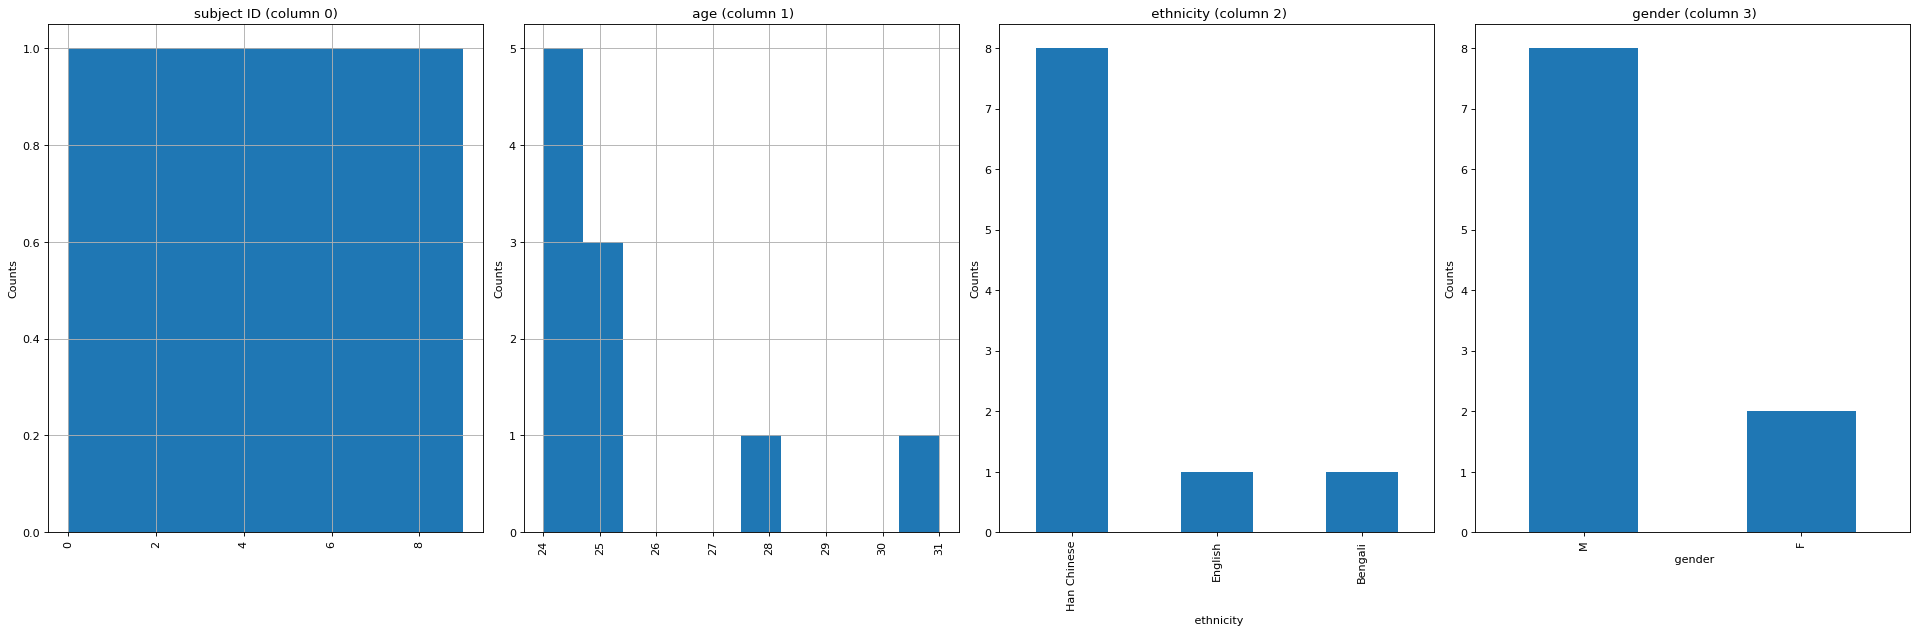

10


In [12]:
plotPerColumnDistribution(df1, 10, 5)
print(nRow)

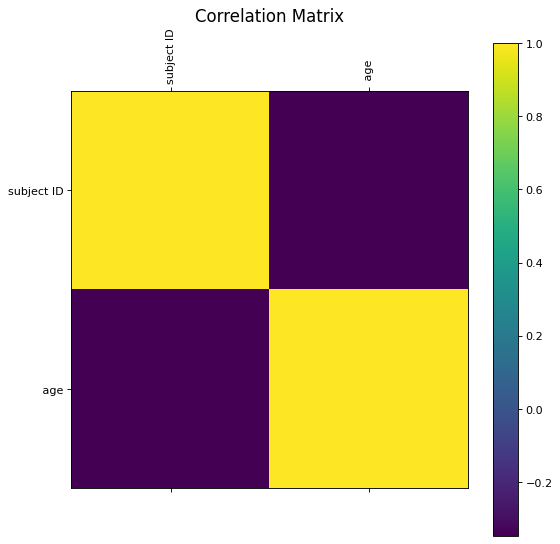

In [13]:

plotCorrelationMatrix(df1, 8)

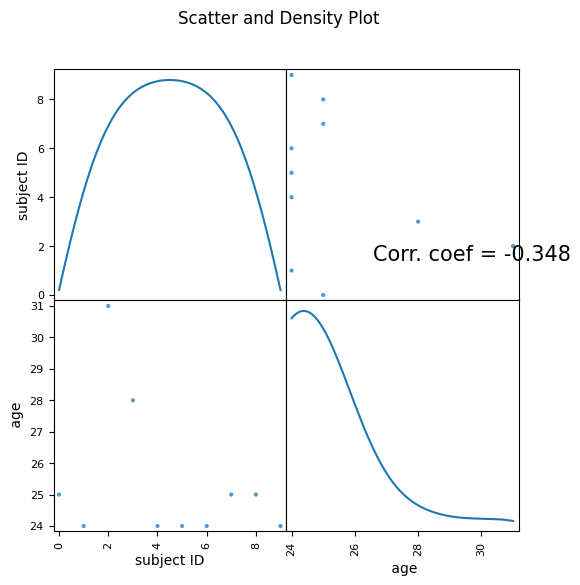

In [14]:
plotScatterMatrix(df1, 6, 15)

In [15]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# EEG_data.csv has 12812 rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('/content/EEG_data.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'EEG_data.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 15 columns


In [80]:
df2.head(5)

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


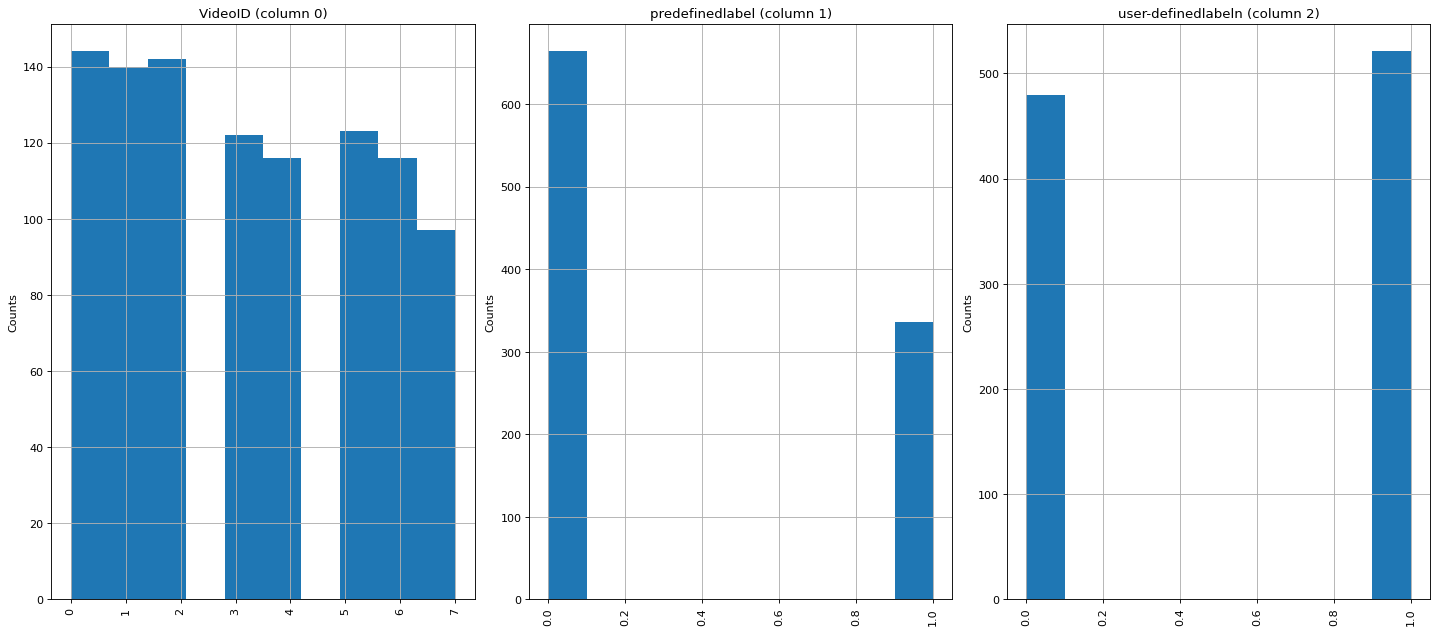

In [16]:
plotPerColumnDistribution(df2, 10, 5)

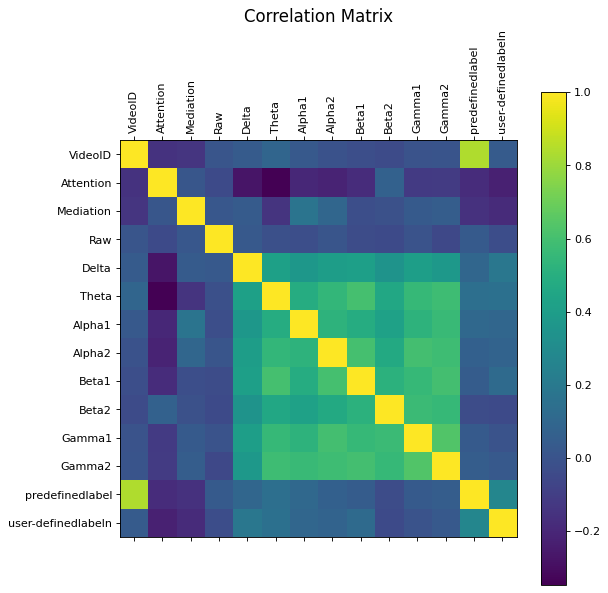

In [17]:
plotCorrelationMatrix(df2, 8)

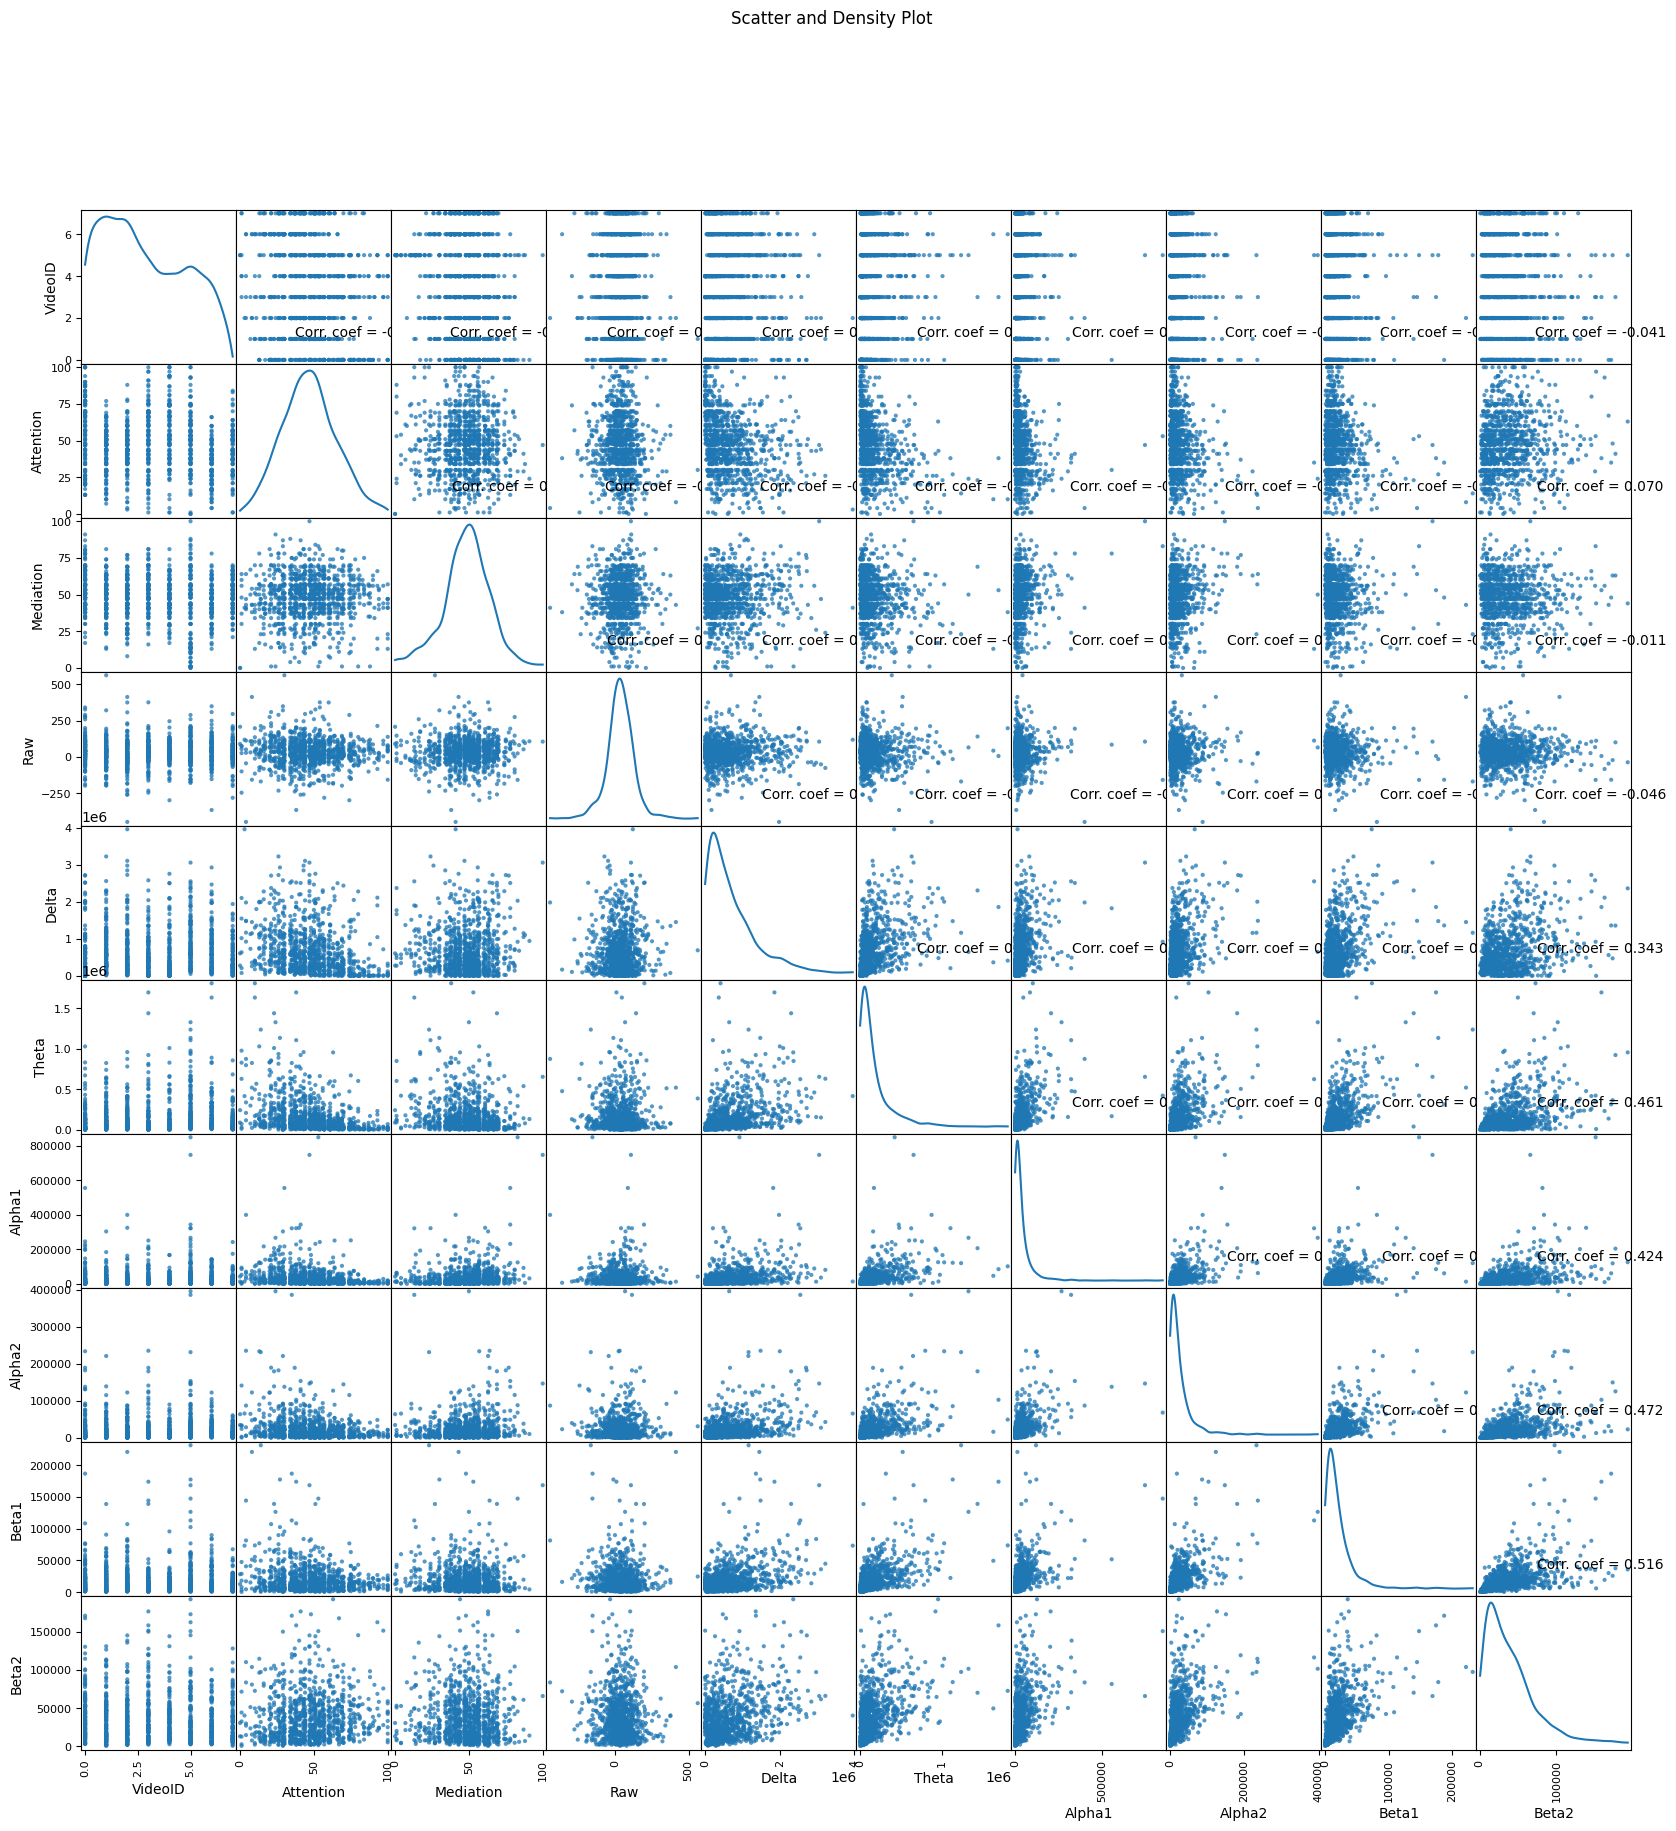

In [18]:
plotScatterMatrix(df2, 20, 10)

In [33]:
import pandas as pd

# Replace 'path_to_demographic_file.csv' with your actual file path
df_demo = pd.read_csv("demographic_info.csv")

# Display the first few rows to verify the data
print(df_demo.head())

df_eeg = pd.read_csv("EEG_data.csv")  # Replace with the actual path
print(df_eeg.head())  # Check if data is loaded properly


# Rename 'subject ID' to 'SubjectID' in the demographic data for consistency
df_demo.rename(columns={'subject ID': 'SubjectID'}, inplace=True)

# Merge datasets on 'SubjectID'
df = pd.merge(df_eeg, df_demo, on='SubjectID', how='inner')

print(df.head())

df.rename(columns=lambda x: x.strip(), inplace=True) # remove space of the col name and comma
print(df.columns.tolist())  # Print column names to verify



   subject ID   age    ethnicity  gender
0           0    25  Han Chinese       M
1           1    24  Han Chinese       M
2           2    31      English       M
3           3    28  Han Chinese       F
4           4    24      Bengali       M
   SubjectID  VideoID  Attention  Mediation    Raw      Delta     Theta  \
0        0.0      0.0       56.0       43.0  278.0   301963.0   90612.0   
1        0.0      0.0       40.0       35.0  -50.0    73787.0   28083.0   
2        0.0      0.0       47.0       48.0  101.0   758353.0  383745.0   
3        0.0      0.0       47.0       57.0   -5.0  2012240.0  129350.0   
4        0.0      0.0       44.0       53.0   -8.0  1005145.0  354328.0   

     Alpha1   Alpha2    Beta1     Beta2   Gamma1   Gamma2  predefinedlabel  \
0   33735.0  23991.0  27946.0   45097.0  33228.0   8293.0              0.0   
1    1439.0   2240.0   2746.0    3687.0   5293.0   2740.0              0.0   
2  201999.0  62107.0  36293.0  130536.0  57243.0  25354.0            

In [34]:
from sklearn.preprocessing import LabelEncoder

# Encode 'gender' column
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])

# One-hot encode 'ethnicity' column
df = pd.get_dummies(df, columns=['ethnicity'], drop_first=True)


In [35]:
# Assuming 'predefinedlabel' is the target variable
X = df.drop(columns=['predefinedlabel', 'user-definedlabeln', 'SubjectID'])
y = df['predefinedlabel']


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [38]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1326
         1.0       1.00      1.00      1.00      1237

    accuracy                           1.00      2563
   macro avg       1.00      1.00      1.00      2563
weighted avg       1.00      1.00      1.00      2563



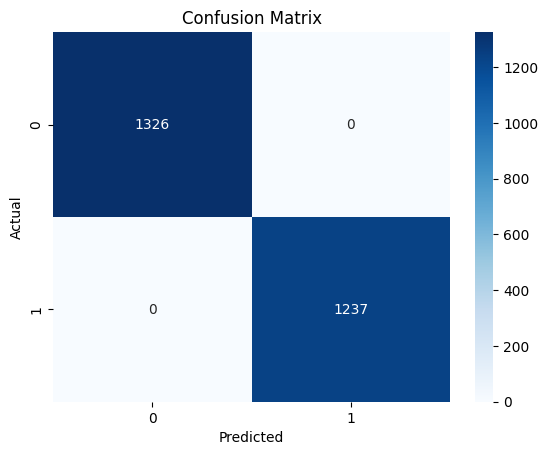

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = rf_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and estimator
print(f'Best Parameters: {grid_search.best_params_}')
best_rf_model = grid_search.best_estimator_


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Tuned Model Accuracy: 1.00
Tuned Model Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1326
         1.0       1.00      1.00      1.00      1237

    accuracy                           1.00      2563
   macro avg       1.00      1.00      1.00      2563
weighted avg       1.00      1.00      1.00      2563



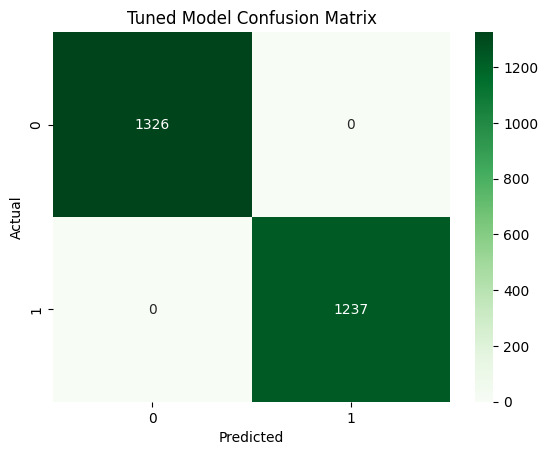

In [41]:
y_pred_tuned = best_rf_model.predict(X_test)

# Accuracy
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
print(f'Tuned Model Accuracy: {tuned_accuracy:.2f}')

# Classification Report
print('Tuned Model Classification Report:')
print(classification_report(y_test, y_pred_tuned))

# Confusion Matrix
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Tuned Model Confusion Matrix')
plt.show()
